In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')

In [3]:
df.head(10)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E65N,Yakima,Granger,WA,98932.0,2022,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,187279214,POINT (-120.1871 46.33949),PACIFICORP,5.307700e+10
1,KNDC3DLC5N,Yakima,Yakima,WA,98902.0,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,210098241,POINT (-120.52041 46.59751),PACIFICORP,5.307700e+10
2,5YJYGDEEXL,Snohomish,Everett,WA,98208.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,44.0,121781950,POINT (-122.18637 47.89251),PUGET SOUND ENERGY INC,5.306104e+10
3,3C3CFFGE1G,Yakima,Yakima,WA,98908.0,2016,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,14.0,180778377,POINT (-120.60199 46.59817),PACIFICORP,5.307700e+10
4,KNDCC3LD5K,Kitsap,Bremerton,WA,98312.0,2019,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,26.0,2581225,POINT (-122.65223 47.57192),PUGET SOUND ENERGY INC,5.303508e+10
5,5YJXCAE29L,Kitsap,Silverdale,WA,98383.0,2020,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,293.0,0.0,23.0,1843054,POINT (-122.69275 47.65171),PUGET SOUND ENERGY INC,5.303509e+10
6,5YJ3E1EB6L,King,Kent,WA,98030.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.0,0.0,47.0,182822020,POINT (-122.19975 47.37483),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
7,JTDKN3DP9F,Kitsap,Bainbridge Island,WA,98110.0,2015,TOYOTA,PRIUS,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,6.0,0.0,23.0,177904170,POINT (-122.521 47.62732),PUGET SOUND ENERGY INC,5.303509e+10
8,1G1FY6S07L,Kitsap,Port Orchard,WA,98367.0,2020,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,259.0,0.0,26.0,132558002,POINT (-122.68471 47.50524),PUGET SOUND ENERGY INC,5.303509e+10
9,1G1RD6S55K,Yakima,Yakima,WA,98908.0,2019,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53.0,0.0,14.0,474853417,POINT (-120.60199 46.59817),PACIFICORP,5.307700e+10


In [4]:
df['State'].unique()

array(['WA', 'BC', 'NS', 'KY', 'CA', 'NC', 'DC', 'MI', 'KS', 'OR', 'AL',
       'MD', 'IL', 'AZ', 'NY', 'GA', 'VA', 'WY', 'NE', 'CO', 'UT', 'NV',
       'MO', 'TX', 'NJ', 'OK', 'FL', 'RI', 'TN', 'CT', 'NH', 'MA', 'HI',
       'WI', 'OH', 'ME', 'PA', 'AK', 'ID', 'DE', 'IN', 'NM', 'MN', 'AP',
       'MS', 'SC', 'LA', 'GU'], dtype=object)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipython-input-880429283.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts.values, palette='viridis')


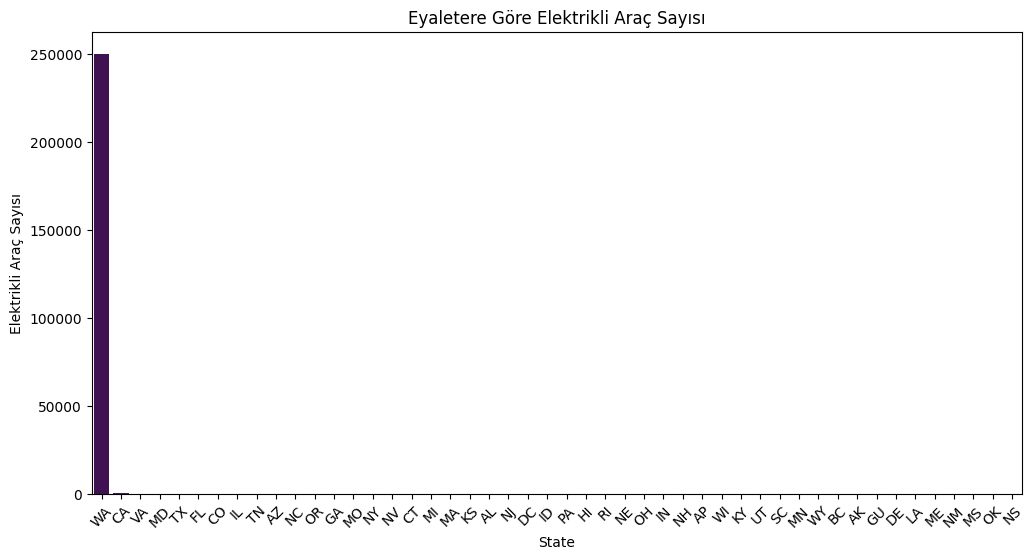

In [6]:
state_counts = df.groupby('State').size().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=state_counts.index, y=state_counts.values, palette='viridis')
plt.xticks(rotation=45)
plt.ylabel('Elektrikli Araç Sayısı')
plt.title('Eyaletere Göre Elektrikli Araç Sayısı')
plt.show()

In [12]:
Counties = df.groupby('County').count().sort_values(by='City',ascending=False)['City'].index
values = df.groupby('County').count().sort_values(by='City',ascending=False)['City'].values

/tmp/ipython-input-507567086.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_counties, y=top_values, palette="RdBu_r")


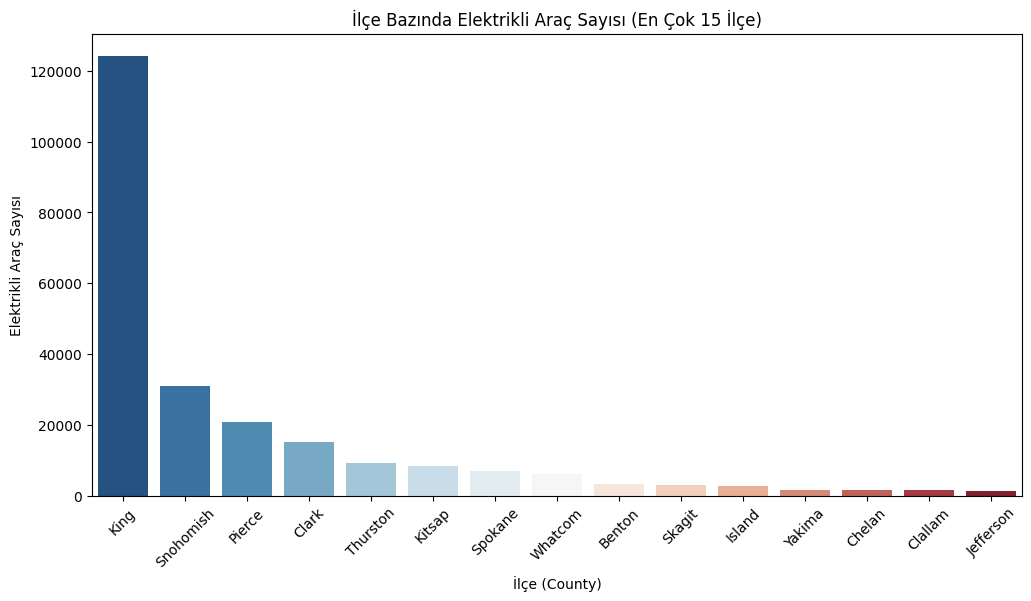

In [13]:
top_counties = Counties[:15]
top_values = values[:15]

plt.figure(figsize=(12,6))
sns.barplot(x=top_counties, y=top_values, palette="RdBu_r")
plt.xticks(rotation=45)
plt.xlabel("İlçe (County)")
plt.ylabel("Elektrikli Araç Sayısı")
plt.title("İlçe Bazında Elektrikli Araç Sayısı (En Çok 15 İlçe)")
plt.show()

Bu grafik Washington (WA) içindeki ilçelerin elektrikli araç (EV) kayıt sayısını karşılaştırır. En yüksek 15 ilçe yoğunlaşma noktalarını gösteriyor; bu yoğunluk altyapı, yerel teşvikler veya nüfus büyüklüğünden kaynaklanıyor olabilir.
Not: Değerler nüfusa göre normalize edilmemiştir — nüfusu büyük ilçeler daha önde görünebilir.

/tmp/ipython-input-1220051664.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_make, y=top_make_values, palette="RdBu_r")


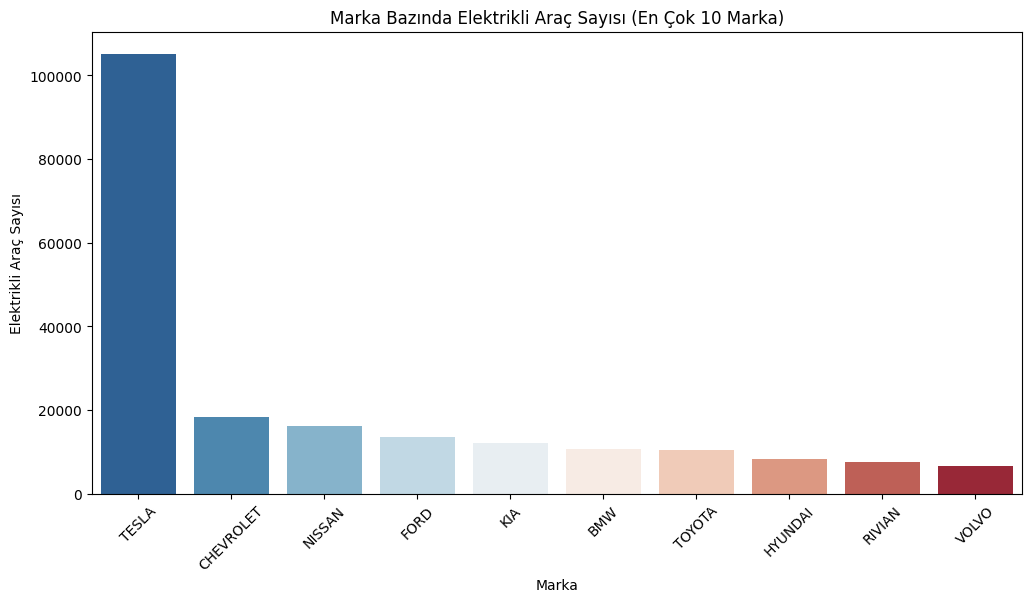

In [57]:
top_make = df['Make'].value_counts().head(10).index
top_make_values = df['Make'].value_counts().head(10).values

plt.figure(figsize=(12,6))
sns.barplot(x=top_make, y=top_make_values, palette="RdBu_r")
plt.xticks(rotation=45)
plt.xlabel("Marka")
plt.ylabel("Elektrikli Araç Sayısı")
plt.title("Marka Bazında Elektrikli Araç Sayısı (En Çok 10 Marka)")
plt.show()

Marka bazında elektrikli araç tercihleri incelendiğinde Tesla belirgin şekilde öne çıkıyor ve açık ara en yüksek sayıya sahip. Onu Chevrolet, Nissan, Ford, Kia, BMW, Toyota, Hyundai, Rivian ve Volvo izliyor. Bu markalar arasında farklar görece küçük, yani Tesla dışındaki pazar payı markalar arasında dengeli dağılmış durumda.

In [58]:
ev_type_counts = df['Electric Vehicle Type'].value_counts()

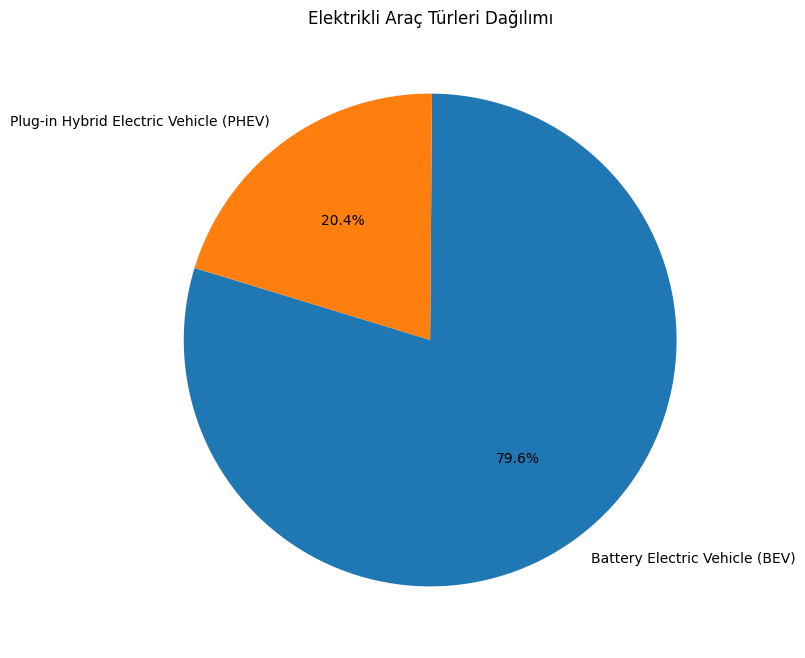

In [59]:
plt.figure(figsize=(8,8))
plt.pie(ev_type_counts, labels=ev_type_counts.index, autopct='%1.1f%%', startangle=163, colors=['#1f77b4', '#ff7f0e','#ff9999'])
plt.title("Elektrikli Araç Türleri Dağılımı")
plt.show()

Elektrikli araç tiplerinin dağılımına bakıldığında BEV’ler (tam elektrikli araçlar) %80 ile baskın durumda. Bu dengesizlik Tesla’nın pazar payının çok yüksek olmasından ve tüm Tesla modellerinin BEV olmasından kaynaklanıyor. PHEV’lerin payı ise %20 ile sınırlı kalmış.

In [60]:
color_combinations = [
    ['#FF9999', '#66B3FF'],
    ['#99FF99', '#FFCC99'],
    ['#FFB347', '#87CEFA'],
    ['#FF6961', '#C0C0C0'],
    ['#FFD700', '#87CEEB'],
    ['#FFA07A', '#20B2AA'],
    ['#DDA0DD', '#90EE90'],
    ['#FF6347', '#4682B4'],
    ['#F08080', '#8FBC8F'],
    ['#E6E6FA', '#FF69B4']
]


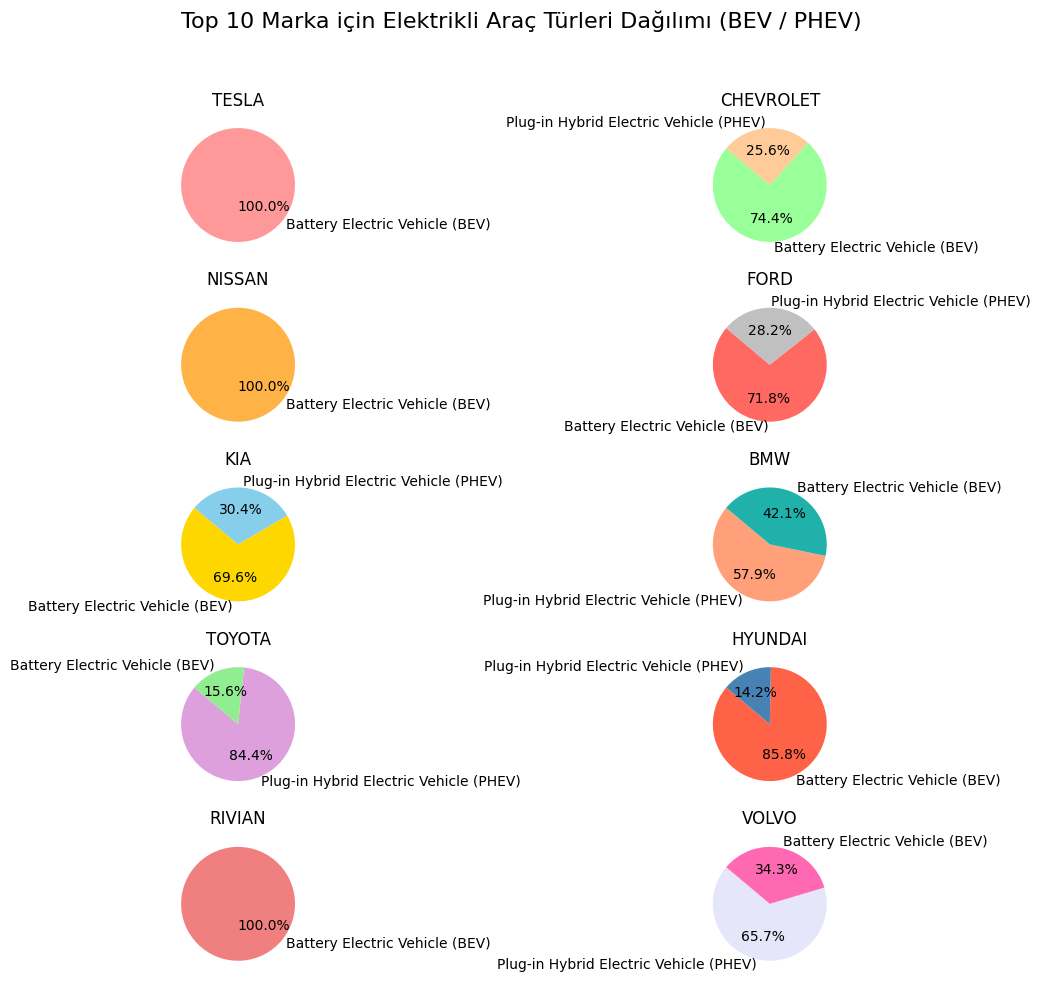

In [73]:
import matplotlib.pyplot as plt

# Top 10 marka
top_make = df['Make'].value_counts().head(10).index
df_top10 = df[df['Make'].isin(top_make)]

# Alt grafikleri ayarlayalım (5 satır, 2 sütun)
fig, axes = plt.subplots(5, 2, figsize=(10, 10))
axes = axes.flatten()

for i, make in enumerate(top_make):
    # Her markanın verisi
    df_make = df_top10[df_top10['Make'] == make]
    ev_type_counts = df_make['Electric Vehicle Type'].value_counts()

    # Pie chart
    axes[i].pie(ev_type_counts, labels=ev_type_counts.index, autopct='%1.1f%%', startangle=140,
                colors=color_combinations[i])
    axes[i].set_title(make)

plt.suptitle("Top 10 Marka için Elektrikli Araç Türleri Dağılımı (BEV / PHEV)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


İlk 10 markanın BEV ve PHEV araç oranlarını gösteren grafikte, markalar bazında bakılsa da genel olarak BEV’lerin daha fazla tercih edildiği açıkça görülüyor.
Bir önceki tabloda BEV oranının %80 çıkmasının iki temel nedeni var:

Tesla’nın yalnızca BEV üretmesi ve pazarda çok büyük bir paya sahip olması

Diğer markaların çoğunda da BEV modellerin ağırlıkta olması

Bu nedenle grafikte BEV oranı yüksek ve PHEV’ler oldukça sınırlı kalıyor. Tesla’nın pazar payı bu sonucu belirgin biçimde yukarı çekiyor.

In [82]:
df.sort_values('Electric Range', ascending=True).head(500)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
160207,3FMTK3SU4P,King,Woodinville,WA,98072.0,2023,FORD,MUSTANG MACH-E,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,45.0,266882101,POINT (-122.15545 47.75448),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
160241,5YJ3E1EB1N,Benton,Kennewick,WA,99337.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,8.0,278340366,POINT (-119.14482 46.18764),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF B...,5.300501e+10
160242,7SAYGDEE7R,King,Sammamish,WA,98074.0,2024,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,45.0,263071266,POINT (-122.02054 47.60326),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
160243,1N4CZ1CV0S,Kitsap,Bremerton,WA,98312.0,2025,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,35.0,277829366,POINT (-122.65223 47.57192),PUGET SOUND ENERGY INC,5.303508e+10
160244,7SAYGAEE2R,King,Fall City,WA,98024.0,2024,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,5.0,273525066,POINT (-121.89086 47.56812),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208101,KMHM54AC5P,King,Seattle,WA,98102.0,2023,HYUNDAI,IONIQ 6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,43.0,238034961,POINT (-122.32427 47.63433),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
101343,7PDSGABA1R,Clark,Vancouver,WA,98665.0,2024,RIVIAN,R1S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,49.0,261457052,POINT (-122.64443 45.67871),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
101349,7SAYGDEE7P,King,Mercer Island,WA,98040.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,41.0,240571817,POINT (-122.21238 47.57816),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
101350,5YJYGDEE5M,Kitsap,Port Orchard,WA,98367.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,148718713,POINT (-122.68471 47.50524),PUGET SOUND ENERGY INC,5.303509e+10


Electric Range analizinin detaylı olarak yapılmamasının nedeni, veri setindeki bazı araçlarda Electric Range değerlerinin eksik veya 0 olarak girilmiş olmasıdır. Yukarıda görüldüğü gibi, ilk 500 kayıt arasında menzil değeri 0 olan birçok araç bulunmakta. Bu eksik veri, histogram veya boxplot gibi analizlerde doğru dağılımı göstermeyi engellediği için menzil analizi sınırlı kaldı.